In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv(r"C:\Users\Vansh\HDFC.csv")
df=df.drop(['Symbol'],axis=1)
df=df.drop(['Series'],axis=1)
df=df.drop(['Prev Close'],axis=1)
df=df.drop(['Last'],axis=1)
df=df.drop(['VWAP'],axis=1)
df=df.drop(['Turnover'],axis=1)
df=df.drop(['Trades'],axis=1)
df=df.drop(['Deliverable Volume'],axis=1)
df=df.drop(['%Deliverble'],axis=1)
df

,Date,Open,High,Low,Close,Volume
0,03-01-2011,737.90,737.9,724.00,728.20,768310
1,04-01-2011,731.00,738.8,725.30,731.75,2071437
2,05-01-2011,727.80,727.8,706.15,708.10,1346235
3,06-01-2011,713.70,714.7,700.80,706.90,1579745
4,07-01-2011,703.10,708.7,680.00,683.90,2377426
...,...,...,...,...,...,...
2553,26-04-2021,2500.00,2534.1,2483.20,2509.80,3916088
2554,27-04-2021,2494.15,2526.8,2486.25,2518.40,2040799
2555,28-04-2021,2516.10,2609.0,2508.30,2577.00,3407461
2556,29-04-2021,2590.90,2628.0,2533.00,2538.85,3005468


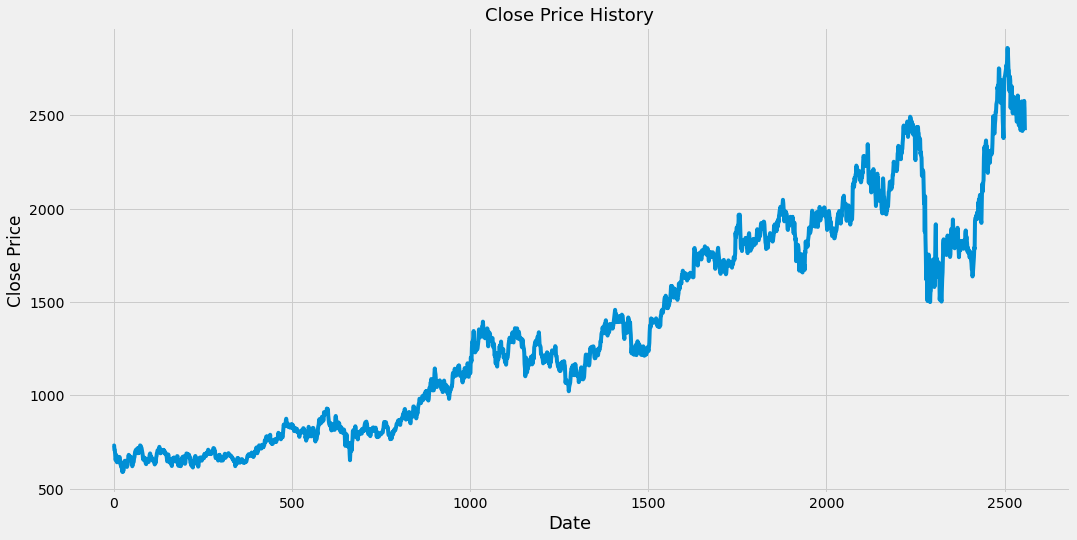

In [3]:
plt.figure(figsize=(16,8))
plt.title("Close Price History",fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price')
plt.show()

In [4]:
def SMA(data,period=30,column='Close'):
    return data[column].rolling(window=period).mean()

In [5]:
df['SMA20'] = SMA(df, 20)
df['SMA50'] = SMA(df, 50)

In [6]:
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff()

In [7]:
df['Buy']=np.where(df['Position']==1,df['Close'],np.nan)
df['Sell']=np.where(df['Position']==-1,df['Close'],np.nan)

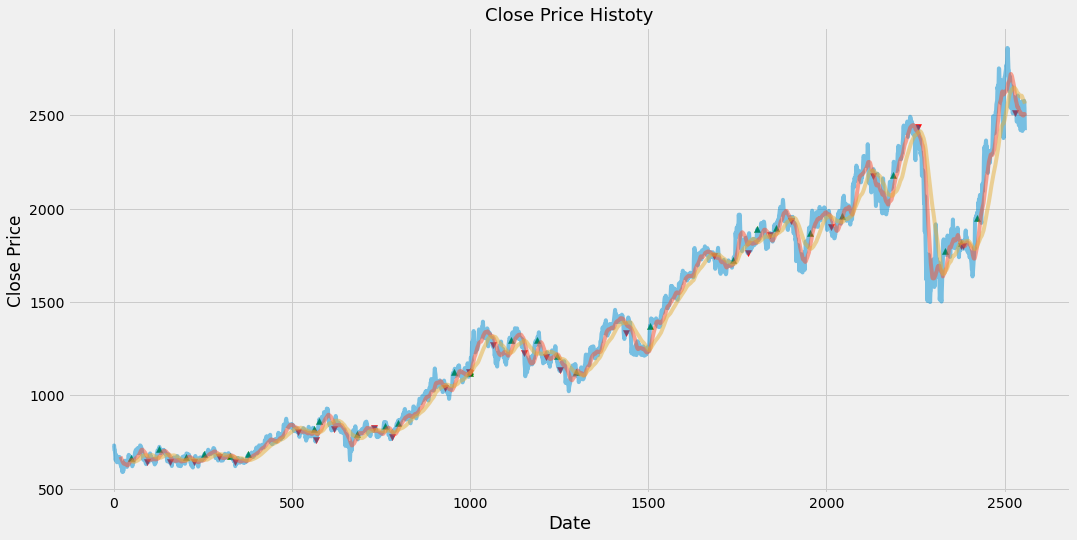

In [8]:
plt.figure(figsize=(16,8))
plt.title("Close Price Histoty",fontsize=18)
plt.plot(df['Close'],alpha=0.5,label='Close')
plt.plot(df['SMA20'],alpha=0.5,label='SMA 20')
plt.plot(df['SMA50'],alpha=0.5,label='SMA 50')
plt.scatter(df.index,df['Buy'],alpha=1,label='Buy Signal',marker='^',color='green')
plt.scatter(df.index,df['Sell'],alpha=1,label='Sell Signal',marker='v',color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price')
plt.show()